# NLP with Python
-----
This is an ipynb following examples and exercises of [Natural Language Processing with Python](http://shop.oreilly.com/product/9780596516499.do).

# Ch 1. Language Processing and Python
-----
## 1.1 Computing with Language: Texts and Words
## Getting started with NLTK

In [72]:
import pandas as pd
import scipy as sp
import numpy as np
import scipy.stats

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 7 # change default figure size

%matplotlib inline
import seaborn as sns
sns.set('poster')

In [169]:
import nltk
from nltk.book import *

In [3]:
text1

<Text: Moby Dick by Herman Melville 1851>

## Searching Text
`concordance` searchs text within a context

In [4]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


In [5]:
text5.concordance("rofl")

Displaying 4 of 4 matches:
moaning ? Werd lol :) PART hiYas U50 Rofl U32 hey U35 sup U37 ??????? hiya U32
ow are you dear ? sounds kinky , U49 rofl U48 !!!! PART ;) U18 !!! lol U48 gig
f MD U49 ? sposs tah tug on it , lol rofl U49 Eastern Shore , U47 at least you
ea monsters lol dated a couple , U48 ROFL U18 U27 that why we got a pool dress


`similar`: texts appear in a similar range of contexts

In [6]:
text1.similar("monstrous")

imperial subtly impalpable pitiable curious abundant perilous
trustworthy untoward singular lamentable few determined maddens
horrible tyrannical lazy mystifying christian exasperate


In [7]:
text2.similar("monstrous")

very exceedingly so heartily a great good amazingly as sweet
remarkably extremely vast


`common_contexts`: examine just the contexts that are shared by two or more words

In [8]:
text2.common_contexts(["monstrous", "very"])

a_pretty is_pretty a_lucky am_glad be_glad


In [9]:
text2.common_contexts(["pretty", "good"])

very_but very_i as_a so_a


`dispersion_plot`: word frequency raster plot

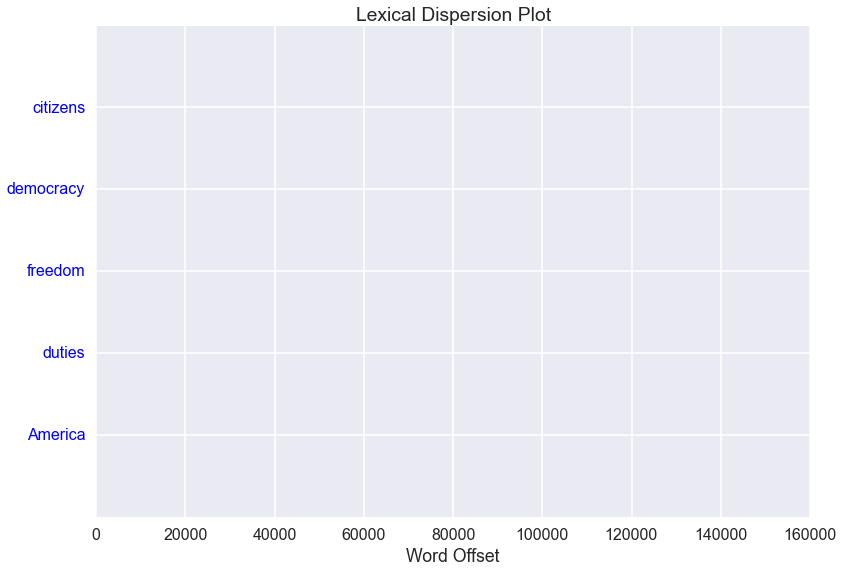

In [68]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

## Counting Vocabulary
text3 (Genesis) has 44,764 words and punctuation symbols, or “tokens.”

In [14]:
len(text3)

44764

In [19]:
print sorted(set(text3))[:30]

[u'!', u"'", u'(', u')', u',', u',)', u'.', u'.)', u':', u';', u';)', u'?', u'?)', u'A', u'Abel', u'Abelmizraim', u'Abidah', u'Abide', u'Abimael', u'Abimelech', u'Abr', u'Abrah', u'Abraham', u'Abram', u'Accad', u'Achbor', u'Adah', u'Adam', u'Adbeel', u'Admah']


In [20]:
len(set(text3))

2789

text3 has 2789 word types.
- A word type is the form or spelling of the word independently of its specific occurrences in a text—that is, the word considered as a unique item of vocabulary

In [23]:
from __future__ import division
len(text3) / len(set(text3))

16.050197203298673

`count`: count word frequency

In [24]:
text3.count("smote")

5

In [27]:
100 * text5.count('lol') / len(text5)

1.5640968673628082

In [32]:
def lexical_diversity(text):
    return len(text) / len(set(text))
def percentage(word, text): 
    return 100 * text.count(word) / len(text)

In [33]:
print lexical_diversity(text3)
print percentage('lol',text5)

16.0501972033
1.56409686736


## 1.2 A Closer Look at Python: Texts as Lists of Words
## Lists, Index, and Strings

In [34]:
sent1 = ['Call', 'me', 'Ishmael', '.']
lexical_diversity(sent1)

1.0

In [36]:
text4.index('awaken')

173

In [37]:
' '.join(['Monty', 'Python'])

'Monty Python'

In [38]:
'Monty Python'.split()

['Monty', 'Python']

In [42]:
'S'.join(['Monty', 'Python', 'A'])

'MontySPythonSA'

## 1.3 Computing with Language: Simple Statistics
## Frequency Distributions: `FreqDist`

In [44]:
fdist1 = FreqDist(text1)
print fdist1

<FreqDist with 19317 samples and 260819 outcomes>


In [45]:
vocabulary1 = fdist1.keys()
print vocabulary1[:50]

[u'funereal', u'unscientific', u'divinely', u'foul', u'four', u'gag', u'prefix', u'woods', u'clotted', u'Duck', u'hanging', u'plaudits', u'woody', u'Until', u'marching', u'disobeying', u'canes', u'granting', u'advantage', u'Westers', u'insertion', u'DRYDEN', u'formless', u'Untried', u'superficially', u'Western', u'portentous', u'beacon', u'meadows', u'sinking', u'Ding', u'Spurn', u'treasuries', u'churned', u'oceans', u'powders', u'tinkerings', u'tantalizing', u'yellow', u'bolting', u'uncertain', u'stabbed', u'bringing', u'elevations', u'ferreting', u'believers', u'wooded', u'songster', u'uttering', u'scholar']


In [58]:
# frequency of word
fdist1['whale']

906

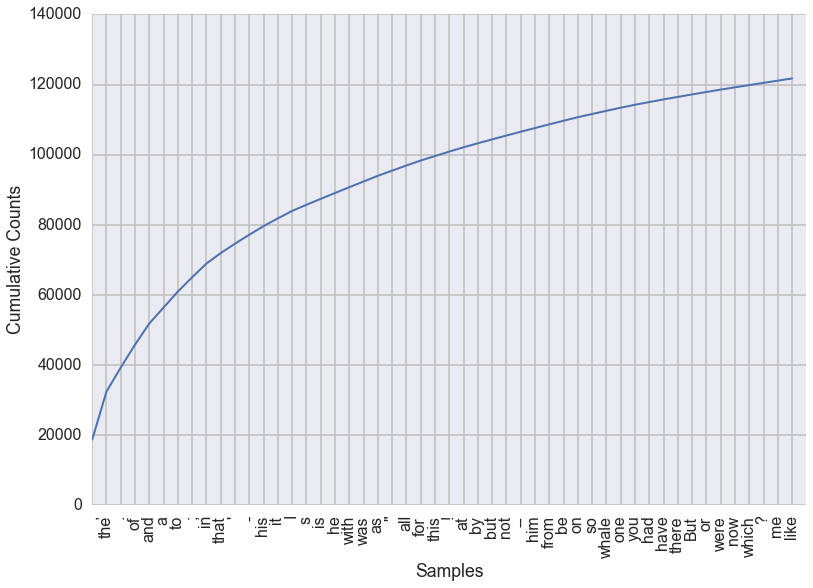

In [76]:
# cumulative plot of the top 50 words
fdist1.plot(50, cumulative=True)

`hapaxes`: words that occur only once

In [79]:
print fdist1.hapaxes()[:50]

[u'funereal', u'unscientific', u'prefix', u'plaudits', u'woody', u'disobeying', u'Westers', u'DRYDEN', u'Untried', u'superficially', u'Western', u'Spurn', u'treasuries', u'powders', u'tinkerings', u'bolting', u'stabbed', u'elevations', u'ferreting', u'believers', u'wooded', u'songster', u'Saco', u'clings', u'Winding', u'Sands', u'spindle', u'ornamental', u'charter', u'puissant', u'imminglings', u'miller', u'cordially', u'railing', u'mail', u'Hecla', u'compliance', u'haughtily', u'relieving', u'BERMUDAS', u'contributed', u'shamble', u'fossil', u'sneering', u'avers', u'intellects', u'Plate', u'gayer', u'Fiery', u'primogenitures']


## Fine-Grained Selection of Words

In [80]:
V = set(text1)
long_words = [w for w in V if len(w) > 15]
print sorted(long_words)

[u'CIRCUMNAVIGATION', u'Physiognomically', u'apprehensiveness', u'cannibalistically', u'characteristically', u'circumnavigating', u'circumnavigation', u'circumnavigations', u'comprehensiveness', u'hermaphroditical', u'indiscriminately', u'indispensableness', u'irresistibleness', u'physiognomically', u'preternaturalness', u'responsibilities', u'simultaneousness', u'subterraneousness', u'supernaturalness', u'superstitiousness', u'uncomfortableness', u'uncompromisedness', u'undiscriminating', u'uninterpenetratingly']


Selecting long words that occur more than once (not hapaxes)

In [81]:
fdist5 = FreqDist(text5)
print sorted([w for w in set(text5) if len(w) > 7 and fdist5[w] > 7])

[u'#14-19teens', u'#talkcity_adults', u'((((((((((', u'........', u'Question', u'actually', u'anything', u'computer', u'cute.-ass', u'everyone', u'football', u'innocent', u'listening', u'remember', u'seriously', u'something', u'together', u'tomorrow', u'watching']


## Collocations and Bigrams
N-grams: a collection of n consecutive words

In [97]:
list(nltk.bigrams(['more', 'is', 'said', 'than', 'done', 'oooh', 'bleh']))

[('more', 'is'),
 ('is', 'said'),
 ('said', 'than'),
 ('than', 'done'),
 ('done', 'oooh'),
 ('oooh', 'bleh')]

`collocations`: build collocations

In [98]:
text4.collocations()

United States; fellow citizens; four years; years ago; Federal
Government; General Government; American people; Vice President; Old
World; Almighty God; Fellow citizens; Chief Magistrate; Chief Justice;
God bless; every citizen; Indian tribes; public debt; one another;
foreign nations; political parties


In [102]:
text8.collocations()

would like; medium build; social drinker; quiet nights; non smoker;
long term; age open; Would like; easy going; financially secure; fun
times; similar interests; Age open; weekends away; poss rship; well
presented; never married; single mum; permanent relationship; slim
build


## Counting Other Things
Use word length

In [106]:
print [len(w) for w in text1][:20]
fdist = FreqDist([len(w) for w in text1]) # 

[1, 4, 4, 2, 6, 8, 4, 1, 9, 1, 1, 8, 2, 1, 4, 11, 5, 2, 1, 7]


In [107]:
fdist.keys()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20]

In [109]:
print fdist.items() # length of words and its frequency

[(1, 47933), (2, 38513), (3, 50223), (4, 42345), (5, 26597), (6, 17111), (7, 14399), (8, 9966), (9, 6428), (10, 3528), (11, 1873), (12, 1053), (13, 567), (14, 177), (15, 70), (16, 22), (17, 12), (18, 1), (20, 1)]


In [110]:
fdist.max() # maximum frequency is when len(w) = 3

3

In [111]:
fdist[3]

50223

In [112]:
fdist.freq(3) # about 20% of the words have length of 3

0.19255882431878046

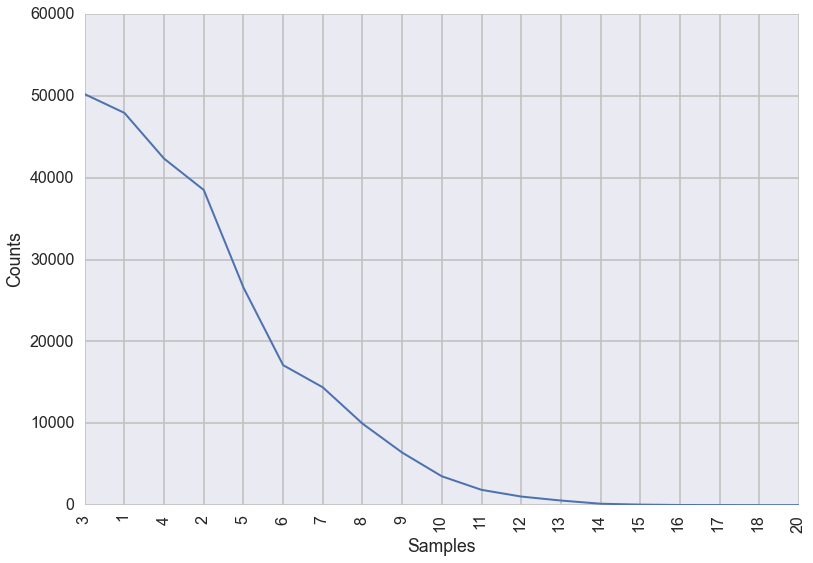

In [116]:
fdist.plot()

## 1.4 Back to Python: Making Decisions and Taking Control
## Conditionals: word comparison operators

In [147]:
s = 'Monty'
print s.startswith('a')
print s.endswith('y')
print 'p' in s
print s.islower()
print s.isalpha() # alphabetical order
print s.isalnum()
print s.isdigit()

False
True
False
False
True
True
False


In [148]:
s = 'a2b2p2y'
print s.startswith('a')
print s.endswith('y')
print 'p' in s
print s.islower()
print s.isalpha() # alphabetical order
print s.isalnum() # alphanumeric
print s.isdigit()

True
True
True
True
False
True
False


In [150]:
print sorted([w for w in set(text1) if w.endswith('ableness')])

[u'comfortableness', u'honourableness', u'immutableness', u'indispensableness', u'indomitableness', u'intolerableness', u'palpableness', u'reasonableness', u'uncomfortableness']


In [151]:
print sorted([term for term in set(text4) if 'gnt' in term])

[u'Sovereignty', u'sovereignties', u'sovereignty']


In [155]:
print sorted([item for item in set(text6) if item.istitle()])[:10]

[u'A', u'Aaaaaaaaah', u'Aaaaaaaah', u'Aaaaaah', u'Aaaah', u'Aaaaugh', u'Aaagh', u'Aaah', u'Aaauggh', u'Aaaugh']


`isdigit()`: useful to find numbers

In [162]:
print sorted([item for item in set(text2) if item.isdigit()])

[u'1', u'10', u'11', u'12', u'13', u'14', u'15', u'16', u'17', u'18', u'1811', u'19', u'2', u'20', u'200', u'21', u'22', u'23', u'24', u'25', u'26', u'27', u'28', u'29', u'3', u'30', u'31', u'32', u'33', u'34', u'35', u'36', u'37', u'38', u'39', u'4', u'40', u'41', u'42', u'43', u'44', u'45', u'46', u'47', u'48', u'49', u'5', u'50', u'6', u'7', u'8', u'9']


## 1.5 Automatic Natural Language Understanding: NLP challenges
- **Word Sense Disambiguation**: work out which sense of a word was in- tended in a given context

> a. The lost children were found by the searchers (agentive) 

> b. The lost children were found by the mountain (locative) 

> c. The lost children were found by the afternoon (temporal) 

- **Pronoun Resolution**: detect the subjects and objects of verbs

> a. The thieves stole the paintings. They were subsequently sold.

> b. The thieves stole the paintings. They were subsequently caught.

> c. The thieves stole the paintings. They were subsequently found.

- **Generating Language Output**: question answering and machine translation

> a. Text: ... The thieves stole the paintings. They were subsequently sold. ... 

> b. Human: Who or what was sold?

> c. Machine: The paintings.

- **Machine Translation**: language A -> language B -> back to language A (oftentimes it is different from the original input)

- **Spoken Dialogue Systems**: Can a system understand a user’s goals by inference?
- **Textual Entailment**: Language understanding (Recognizing Textual Entailment (RTE))

> a. Text: David Golinkin is the editor or author of 18 books, and over 150 responsa, articles, sermons and books

> b. Hypothesis: Golinkin has written 18 books

> - In order to determine whether the hypothesis is supported by the text, the system needs the following background knowledge: (i) if someone is an author of a book, then he/ she has written that book; (ii) if someone is an editor of a book, then he/she has not written (all of) that book; (iii) if someone is editor or author of 18 books, then one cannot conclude that he/she is author of 18 books.

# Ch 2. Accessing Text Corpora and Lexical Resources
-----
1. What are some useful text corpora and lexical resources, and how can we access them with Python?
2. Which Python constructs are most helpful for this work?
3. How do we avoid repeating ourselves when writing Python code?

## 2.1 Accessing Text Corpora

## Gutenberg Corpus
Some 25,000 free electronic books, hosted at http://www.gutenberg.org/

In [168]:
nltk.corpus.gutenberg.fileids()

[u'austen-emma.txt',
 u'austen-persuasion.txt',
 u'austen-sense.txt',
 u'bible-kjv.txt',
 u'blake-poems.txt',
 u'bryant-stories.txt',
 u'burgess-busterbrown.txt',
 u'carroll-alice.txt',
 u'chesterton-ball.txt',
 u'chesterton-brown.txt',
 u'chesterton-thursday.txt',
 u'edgeworth-parents.txt',
 u'melville-moby_dick.txt',
 u'milton-paradise.txt',
 u'shakespeare-caesar.txt',
 u'shakespeare-hamlet.txt',
 u'shakespeare-macbeth.txt',
 u'whitman-leaves.txt']

In [170]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')

`concordance` works with nltk.Text

In [171]:
emma = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))
emma.concordance("surprize")

Displaying 25 of 37 matches:
er father , was sometimes taken by surprize at his being still able to pity ` 
hem do the other any good ." " You surprize me ! Emma must do Harriet good : a
Knightley actually looked red with surprize and displeasure , as he stood up ,
r . Elton , and found to his great surprize , that Mr . Elton was actually on 
d aid ." Emma saw Mrs . Weston ' s surprize , and felt that it must be great ,
father was quite taken up with the surprize of so sudden a journey , and his f
y , in all the favouring warmth of surprize and conjecture . She was , moreove
he appeared , to have her share of surprize , introduction , and pleasure . Th
ir plans ; and it was an agreeable surprize to her , therefore , to perceive t
talking aunt had taken me quite by surprize , it must have been the death of m
f all the dialogue which ensued of surprize , and inquiry , and congratulation
 the present . They might chuse to surprize her ." Mrs . Cole had many to agre
the mode of it , the my

In [172]:
from nltk.corpus import gutenberg
emma = gutenberg.words('austen-emma.txt')

In [173]:
# a short program to display other information about each text
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))  # raw: letters
    num_words = len(gutenberg.words(fileid)) 
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set([w.lower() for w in gutenberg.words(fileid)]))
    print int(num_chars/num_words), int(num_words/num_sents), int(num_words/num_vocab), fileid
    # int(num_chars/num_words): average word length (# characters)
    # int(num_words/num_sents): average sentence length (# words)
    # int(num_words/num_vocab): the number of times each vocabulary item appears in the text on average 
                            # (lexical diversity score)

4 24 26 austen-emma.txt
4 26 16 austen-persuasion.txt
4 28 22 austen-sense.txt
4 33 79 bible-kjv.txt
4 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 17 12 burgess-busterbrown.txt
4 20 12 carroll-alice.txt
4 20 11 chesterton-ball.txt
4 22 11 chesterton-brown.txt
4 18 10 chesterton-thursday.txt
4 20 24 edgeworth-parents.txt
4 25 15 melville-moby_dick.txt
4 52 10 milton-paradise.txt
4 11 8 shakespeare-caesar.txt
4 12 7 shakespeare-hamlet.txt
4 12 6 shakespeare-macbeth.txt
4 36 12 whitman-leaves.txt


In [181]:
# sents: split the corpus into sentences
macbeth_sentences = gutenberg.sents('shakespeare-macbeth.txt')
print macbeth_sentences
print macbeth_sentences[1037]

[[u'[', u'The', u'Tragedie', u'of', u'Macbeth', u'by', u'William', u'Shakespeare', u'1603', u']'], [u'Actus', u'Primus', u'.'], ...]
[u'Good', u'night', u',', u'and', u'better', u'health', u'Attend', u'his', u'Maiesty']


In [185]:
longest_len = max([len(s) for s in macbeth_sentences])
print longest_len
print [s for s in macbeth_sentences if len(s) == longest_len]

158
[[u'Doubtfull', u'it', u'stood', u',', u'As', u'two', u'spent', u'Swimmers', u',', u'that', u'doe', u'cling', u'together', u',', u'And', u'choake', u'their', u'Art', u':', u'The', u'mercilesse', u'Macdonwald', u'(', u'Worthie', u'to', u'be', u'a', u'Rebell', u',', u'for', u'to', u'that', u'The', u'multiplying', u'Villanies', u'of', u'Nature', u'Doe', u'swarme', u'vpon', u'him', u')', u'from', u'the', u'Westerne', u'Isles', u'Of', u'Kernes', u'and', u'Gallowgrosses', u'is', u'supply', u"'", u'd', u',', u'And', u'Fortune', u'on', u'his', u'damned', u'Quarry', u'smiling', u',', u'Shew', u"'", u'd', u'like', u'a', u'Rebells', u'Whore', u':', u'but', u'all', u"'", u's', u'too', u'weake', u':', u'For', u'braue', u'Macbeth', u'(', u'well', u'hee', u'deserues', u'that', u'Name', u')', u'Disdayning', u'Fortune', u',', u'with', u'his', u'brandisht', u'Steele', u',', u'Which', u'smoak', u"'", u'd', u'with', u'bloody', u'execution', u'(', u'Like', u'Valours', u'Minion', u')', u'caru', u"'", u'

## Web and Chat Text

In [187]:
from nltk.corpus import webtext
for fileid in webtext.fileids():
    print fileid, webtext.raw(fileid)[:65], '...'

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to se ...
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop ...
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr ...
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encoun ...
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawb ...


In [191]:
from nltk.corpus import nps_chat
chatroom = nps_chat.posts('10-19-20s_706posts.xml')
print chatroom[123]

[u'i', u'do', u"n't", u'want', u'hot', u'pics', u'of', u'a', u'female', u',', u'I', u'can', u'look', u'in', u'a', u'mirror', u'.']


## Brown Corpus
- The first million-word electronic corpus of English, created in 1961 at Brown University
- A convenient resource for studying systematic differences between genres, a kind of linguistic inquiry known as stylistics

In [200]:
from nltk.corpus import brown
print brown.categories()

[u'adventure', u'belles_lettres', u'editorial', u'fiction', u'government', u'hobbies', u'humor', u'learned', u'lore', u'mystery', u'news', u'religion', u'reviews', u'romance', u'science_fiction']


In [203]:
news_text = brown.words(categories='news')
fdist = nltk.FreqDist([w.lower() for w in news_text])
modals = ['can', 'could', 'may', 'might', 'must', 'will']
for m in modals:
    print m + ':', fdist[m],

can: 94 could: 87 may: 93 might: 38 must: 53 will: 389


In [214]:
mystery_text = brown.words(categories='mystery')
fdist = nltk.FreqDist([w.lower() for w in mystery_text])
wh_words = [ 'what', 'when', 'where', 'who', 'why']
for wh_word in wh_words:
    print wh_word + ':', fdist[wh_word],

what: 146 when: 154 where: 71 who: 94 why: 52


In [215]:
# counts for each genre of interest
cfd = nltk.ConditionalFreqDist((genre, word) 
                               for genre in brown.categories()
                               for word in brown.words(categories=genre))

In [216]:
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor'] 
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                 can could  may might must will 
           news   93   86   66   38   50  389 
       religion   82   59   78   12   54   71 
        hobbies  268   58  131   22   83  264 
science_fiction   16   49    4   12    8   16 
        romance   74  193   11   51   45   43 
          humor   16   30    8    8    9   13 


## Reuters Corpus
The documents have been classified into 90 topics, and grouped into two sets, called “train- ing” and “test”; thus, the text with fileid 'test/14826' is a document drawn from the test set

In [220]:
from nltk.corpus import reuters
print reuters.fileids()[:10]
print reuters.categories()

['test/14826', 'test/14828', 'test/14829', 'test/14832', 'test/14833', 'test/14839', 'test/14840', 'test/14841', 'test/14842', 'test/14843']
[u'acq', u'alum', u'barley', u'bop', u'carcass', u'castor-oil', u'cocoa', u'coconut', u'coconut-oil', u'coffee', u'copper', u'copra-cake', u'corn', u'cotton', u'cotton-oil', u'cpi', u'cpu', u'crude', u'dfl', u'dlr', u'dmk', u'earn', u'fuel', u'gas', u'gnp', u'gold', u'grain', u'groundnut', u'groundnut-oil', u'heat', u'hog', u'housing', u'income', u'instal-debt', u'interest', u'ipi', u'iron-steel', u'jet', u'jobs', u'l-cattle', u'lead', u'lei', u'lin-oil', u'livestock', u'lumber', u'meal-feed', u'money-fx', u'money-supply', u'naphtha', u'nat-gas', u'nickel', u'nkr', u'nzdlr', u'oat', u'oilseed', u'orange', u'palladium', u'palm-oil', u'palmkernel', u'pet-chem', u'platinum', u'potato', u'propane', u'rand', u'rape-oil', u'rapeseed', u'reserves', u'retail', u'rice', u'rubber', u'rye', u'ship', u'silver', u'sorghum', u'soy-meal', u'soy-oil', u'soybean',

In [225]:
print reuters.categories('training/9865')
print reuters.categories(['training/9865', 'training/9880'])
print reuters.fileids('barley')
print reuters.fileids(['barley', 'corn'])[:10]

[u'barley', u'corn', u'grain', u'wheat']
[u'barley', u'corn', u'grain', u'money-fx', u'wheat']
[u'test/15618', u'test/15649', u'test/15676', u'test/15728', u'test/15871', u'test/15875', u'test/15952', u'test/17767', u'test/17769', u'test/18024', u'test/18263', u'test/18908', u'test/19275', u'test/19668', u'training/10175', u'training/1067', u'training/11208', u'training/11316', u'training/11885', u'training/12428', u'training/13099', u'training/13744', u'training/13795', u'training/13852', u'training/13856', u'training/1652', u'training/1970', u'training/2044', u'training/2171', u'training/2172', u'training/2191', u'training/2217', u'training/2232', u'training/3132', u'training/3324', u'training/395', u'training/4280', u'training/4296', u'training/5', u'training/501', u'training/5467', u'training/5610', u'training/5640', u'training/6626', u'training/7205', u'training/7579', u'training/8213', u'training/8257', u'training/8759', u'training/9865', u'training/9958']
[u'test/14832', u'test/

In [231]:
print reuters.words('training/9865')[:14]
print reuters.words(['training/9865', 'training/9880'])
print reuters.words(categories='barley')
print reuters.words(categories=['barley', 'corn'])

[u'FRENCH', u'FREE', u'MARKET', u'CEREAL', u'EXPORT', u'BIDS', u'DETAILED', u'French', u'operators', u'have', u'requested', u'licences', u'to', u'export']
[u'FRENCH', u'FREE', u'MARKET', u'CEREAL', u'EXPORT', ...]
[u'FRENCH', u'FREE', u'MARKET', u'CEREAL', u'EXPORT', ...]
[u'THAI', u'TRADE', u'DEFICIT', u'WIDENS', u'IN', ...]


## Inaugural Address Corpus

In [233]:
from nltk.corpus import inaugural
print inaugural.fileids()

[u'1789-Washington.txt', u'1793-Washington.txt', u'1797-Adams.txt', u'1801-Jefferson.txt', u'1805-Jefferson.txt', u'1809-Madison.txt', u'1813-Madison.txt', u'1817-Monroe.txt', u'1821-Monroe.txt', u'1825-Adams.txt', u'1829-Jackson.txt', u'1833-Jackson.txt', u'1837-VanBuren.txt', u'1841-Harrison.txt', u'1845-Polk.txt', u'1849-Taylor.txt', u'1853-Pierce.txt', u'1857-Buchanan.txt', u'1861-Lincoln.txt', u'1865-Lincoln.txt', u'1869-Grant.txt', u'1873-Grant.txt', u'1877-Hayes.txt', u'1881-Garfield.txt', u'1885-Cleveland.txt', u'1889-Harrison.txt', u'1893-Cleveland.txt', u'1897-McKinley.txt', u'1901-McKinley.txt', u'1905-Roosevelt.txt', u'1909-Taft.txt', u'1913-Wilson.txt', u'1917-Wilson.txt', u'1921-Harding.txt', u'1925-Coolidge.txt', u'1929-Hoover.txt', u'1933-Roosevelt.txt', u'1937-Roosevelt.txt', u'1941-Roosevelt.txt', u'1945-Roosevelt.txt', u'1949-Truman.txt', u'1953-Eisenhower.txt', u'1957-Eisenhower.txt', u'1961-Kennedy.txt', u'1965-Johnson.txt', u'1969-Nixon.txt', u'1973-Nixon.txt', u'

In [235]:
print [fileid[:4] for fileid in inaugural.fileids()]

[u'1789', u'1793', u'1797', u'1801', u'1805', u'1809', u'1813', u'1817', u'1821', u'1825', u'1829', u'1833', u'1837', u'1841', u'1845', u'1849', u'1853', u'1857', u'1861', u'1865', u'1869', u'1873', u'1877', u'1881', u'1885', u'1889', u'1893', u'1897', u'1901', u'1905', u'1909', u'1913', u'1917', u'1921', u'1925', u'1929', u'1933', u'1937', u'1941', u'1945', u'1949', u'1953', u'1957', u'1961', u'1965', u'1969', u'1973', u'1977', u'1981', u'1985', u'1989', u'1993', u'1997', u'2001', u'2005', u'2009']


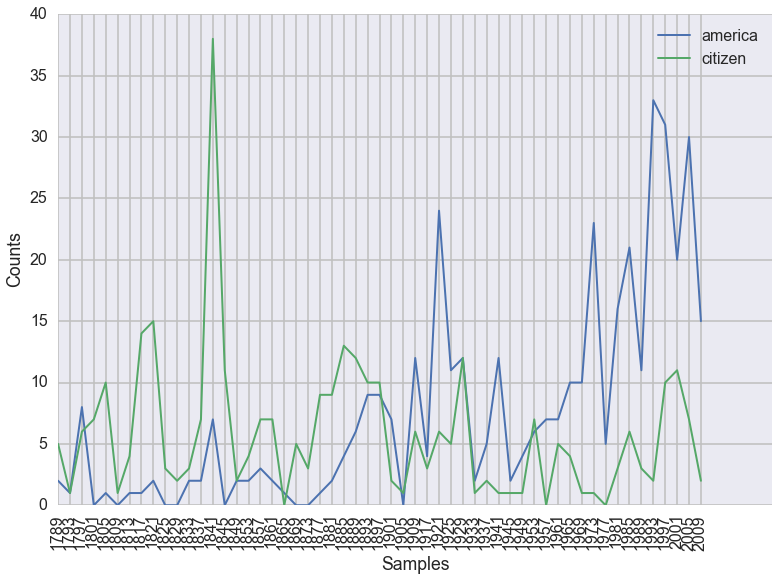

In [245]:
cfd = nltk.ConditionalFreqDist((target, fileid[:4])
                               for fileid in inaugural.fileids()
                               for w in inaugural.words(fileid)
                               for target in ['america', 'citizen']
                               if w.lower().startswith(target))
cfd.plot()

## Loading Your Own Corpus
Use NLTK’s `PlaintextCorpusReader`

## 2.2 Conditional Frequency Distributions
## Conditions and Events
`text = ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]`

`pairs = [('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ...]` -> (condition, event) format
## Counting Words by Genre

In [246]:
genre_word = [(genre, word)
              for genre in ['news', 'romance']
              for word in brown.words(categories=genre)]

In [249]:
print genre_word[:4]
print genre_word[-4:]

[('news', u'The'), ('news', u'Fulton'), ('news', u'County'), ('news', u'Grand')]
[('romance', u'afraid'), ('romance', u'not'), ('romance', u"''"), ('romance', u'.')]


In [253]:
cfd = nltk.ConditionalFreqDist(genre_word)
print cfd.conditions()
print cfd.keys()

['romance', 'news']
['romance', 'news']


In [258]:
print list(cfd['news'])[:10]
print list(cfd['romance'])[:10]

[u'stock', u'sunbonnet', u'Elevated', u'narcotic', u'four', u'woods', u'railing', u'Until', u'aggression', u'marching']
[u'raining', u'belligerence', u'yellow', u'factory', u'four', u'Does', u'railing', u'ringlets', u'self-pity', u'attracted']


## Plotting and Tabulating Distributions
Working with the news and romance genres from the Brown Corpus, find out which days of the week are most newsworthy, and which are most romantic. Define a variable called days containing alistofdaysoftheweek,i.e.,['Monday', ...].Nowtabulatethecounts for these words using cfd.tabulate(samples=days). Now try the same thing using plot in place of tabulate. You may control the output order of days with the help of an extra parameter: condi tions=['Monday', ...].

In [263]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
cfd = nltk.ConditionalFreqDist(genre_word)
cfd.tabulate(samples=days)

        Monday Tuesday Wednesday Thursday Friday Saturday Sunday 
   news   54   43   22   20   41   33   51 
romance    2    3    3    1    3    4    5 


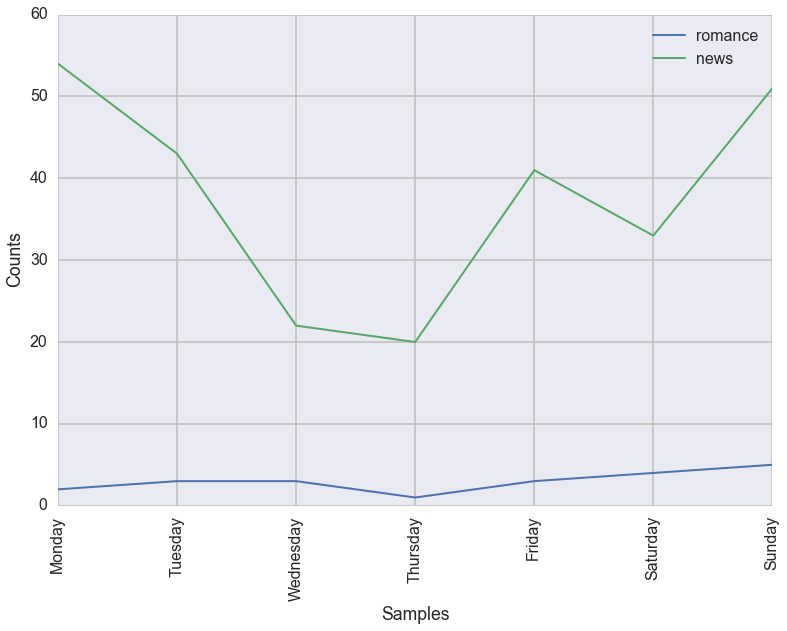

In [274]:
cfd.plot(conditions=['romance','news'], samples=days)

## Generating Random Text with Bigrams

In [279]:
def generate_model(cfdist, word, num=15): 
    """
        This program obtains all bigrams from the text corpus, 
        then constructs a conditional frequency distribution 
        to record which words are most likely to follow a given word; 
        e.g., in Genesis, after the word 'living', the most likely word is 'creature'; 
        the generate_model() function uses this data, and a seed word, to generate random text.    
    """
    for i in range(num):
        print word, 
        word = cfdist[word].max()

text = nltk.corpus.genesis.words('english-kjv.txt') 
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

In [294]:
print cfd['living'].max()
print cfd['creature'].max()
print cfd['that'].max()

creature
that
he


In [295]:
generate_model(cfd, 'living')

living creature that he said , and the land of the land of the land


## 2.4 Lexical Resources
- **A lexicon, or lexical resource**: a collection of words and/or phrases along with associated information, such as part-of-speech and sense definitions. (ex. `sorted(set(my_text)` or `FreqDist(my_text)`)
- **A lexical entry** consists of a **headword** (also known as a **lemma**) along with additional information
- **homonyms**: two distinct words having the same spelling

## Wordlist Corpora

In [302]:
def unusual_words(text):
    """
        This program computes the vocabulary of a text, 
        then removes all items that occur in an existing wordlist, 
        leaving just the uncommon or misspelled words.
    """
    text_vocab = set(w.lower() for w in text if w.isalpha())  # pick words with characters
    english_vocab = set(w.lower() for w in nltk.corpus.words.words()) 
    unusual = text_vocab.difference(english_vocab)
    return sorted(unusual)

In [305]:
print unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt'))[:10]

[u'abbeyland', u'abhorred', u'abilities', u'abounded', u'abridgement', u'abused', u'abuses', u'accents', u'accepting', u'accommodations']


In [306]:
print unusual_words(nltk.corpus.nps_chat.words())[:10]

[u'aaaaaaaaaaaaaaaaa', u'aaahhhh', u'abortions', u'abou', u'abourted', u'abs', u'ack', u'acros', u'actualy', u'adams']


In [309]:
# stopwords
from nltk.corpus import stopwords
print stopwords.words('english')[:50]

[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u'her', u'hers', u'herself', u'it', u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do']


In [312]:
# check non-stopwords contents
def content_fraction(text):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower not in stopwords]
    return len(content)/len(text)

In [329]:
# solving word puzzles
puzzle_letters = nltk.FreqDist('egivrvonl')
musthave = 'r'
wordlist = nltk.corpus.words.words()
length_constraint = 6

"""check that the frequency of each letter in the candidate word is 
less than or equal to the frequency of the corresponding letter in the puzzle""" 
print [w for w in wordlist if len(w) >= length_constraint 
                             and musthave in w
                             and nltk.FreqDist(w) <= puzzle_letters]                        

[u'glover', u'gorlin', u'govern', u'grovel', u'ignore', u'involver', u'lienor', u'linger', u'longer', u'lovering', u'noiler', u'overling', u'region', u'renvoi', u'revolving', u'ringle', u'roving', u'violer', u'virole']


In [331]:
# name corpus
names = nltk.corpus.names
print names.fileids()
male_names = names.words('male.txt')
female_names = names.words('female.txt')
print [w for w in male_names if w in female_names][:10]

[u'female.txt', u'male.txt']
[u'Abbey', u'Abbie', u'Abby', u'Addie', u'Adrian', u'Adrien', u'Ajay', u'Alex', u'Alexis', u'Alfie']


In [339]:
names.fileids()

[u'female.txt', u'male.txt']

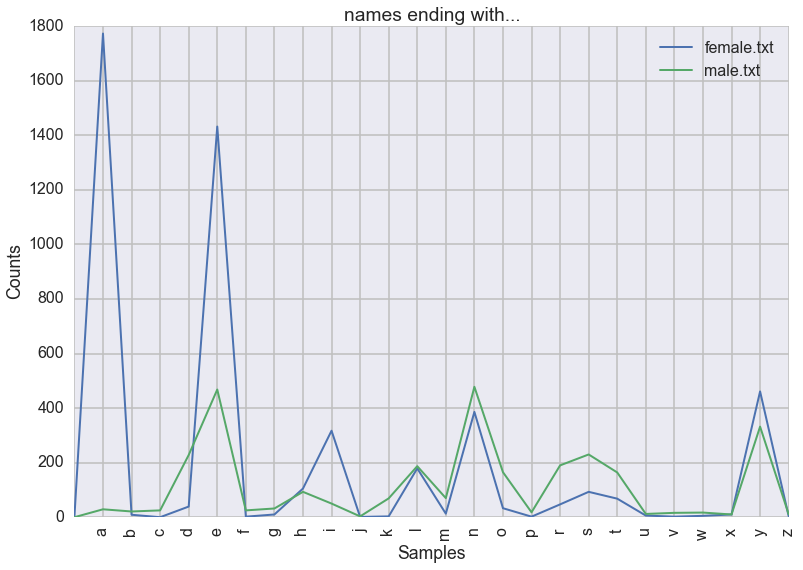

In [352]:
cfd = nltk.ConditionalFreqDist( (fileid, name[-1])
                               for fileid in names.fileids()
                               for name in names.words(fileid))
plt.title('names ending with...')
cfd.plot()

## Shoebox and Toolbox Lexicons
A Toolbox file consists of a collection of entries, where each entry is made up of one or more fields. Most fields are optional or repeatable, which means that this kind of lexical resource cannot be treated as a table or spreadsheet.

## 2.5 WordNet
A semantically oriented dictionary of English, similar to a traditional thesaurus but with a richer structure.
## Senses and Synonyms
- synset: synonym set (a collection of synonymous words (or “lemmas”))

In [353]:
from nltk.corpus import wordnet as wn
wn.synsets('motorcar')

[Synset('car.n.01')]

In [356]:
print wn.synset('car.n.01').lemma_names()
print wn.synset('car.n.01').definition()

[u'car', u'auto', u'automobile', u'machine', u'motorcar']
a motor vehicle with four wheels; usually propelled by an internal combustion engine


In [360]:
print wn.synset('car.n.01').lemmas()
print wn.lemma('car.n.01.automobile')
print wn.lemma('car.n.01.automobile').synset()
print wn.lemma('car.n.01.automobile').name()

[Lemma('car.n.01.car'), Lemma('car.n.01.auto'), Lemma('car.n.01.automobile'), Lemma('car.n.01.machine'), Lemma('car.n.01.motorcar')]
Lemma('car.n.01.automobile')
Synset('car.n.01')
automobile


In [361]:
print wn.synsets('car')

[Synset('car.n.01'), Synset('car.n.02'), Synset('car.n.03'), Synset('car.n.04'), Synset('cable_car.n.01')]


In [363]:
for synset in wn.synsets('car'):
    print synset.lemma_names()

[u'car', u'auto', u'automobile', u'machine', u'motorcar']
[u'car', u'railcar', u'railway_car', u'railroad_car']
[u'car', u'gondola']
[u'car', u'elevator_car']
[u'cable_car', u'car']


## The WordNet Hierarchy
- WordNet synsets correspond to abstract concepts, and they don’t always have corresponding words in English. 
- These concepts are linked together in a hierarchy.
- Some concepts are very general, such as Entity, State, Event; these are called **unique beginners** or root synsets. 
- **hypernym/hyponym**: indicating relationship between superordinate and subordinate concepts

In [369]:
motorcar = wn.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms()
print types_of_motorcar[26]

Synset('stanley_steamer.n.01')


In [376]:
[synset for synset in types_of_motorcar][:10]

[Synset('ambulance.n.01'),
 Synset('beach_wagon.n.01'),
 Synset('bus.n.04'),
 Synset('cab.n.03'),
 Synset('compact.n.03'),
 Synset('convertible.n.01'),
 Synset('coupe.n.01'),
 Synset('cruiser.n.01'),
 Synset('electric.n.01'),
 Synset('gas_guzzler.n.01')]

In [385]:
print synset
print [lemma.name() for lemma in synset.lemmas()]

Synset('used-car.n.01')
[u'used-car', u'secondhand_car']


In [373]:
print sorted([lemma.name() 
              for synset in types_of_motorcar 
              for lemma in synset.lemmas()])

[u'Model_T', u'S.U.V.', u'SUV', u'Stanley_Steamer', u'ambulance', u'beach_waggon', u'beach_wagon', u'bus', u'cab', u'compact', u'compact_car', u'convertible', u'coupe', u'cruiser', u'electric', u'electric_automobile', u'electric_car', u'estate_car', u'gas_guzzler', u'hack', u'hardtop', u'hatchback', u'heap', u'horseless_carriage', u'hot-rod', u'hot_rod', u'jalopy', u'jeep', u'landrover', u'limo', u'limousine', u'loaner', u'minicar', u'minivan', u'pace_car', u'patrol_car', u'phaeton', u'police_car', u'police_cruiser', u'prowl_car', u'race_car', u'racer', u'racing_car', u'roadster', u'runabout', u'saloon', u'secondhand_car', u'sedan', u'sport_car', u'sport_utility', u'sport_utility_vehicle', u'sports_car', u'squad_car', u'station_waggon', u'station_wagon', u'stock_car', u'subcompact', u'subcompact_car', u'taxi', u'taxicab', u'tourer', u'touring_car', u'two-seater', u'used-car', u'waggon', u'wagon']


In [389]:
print motorcar.hypernyms()
paths = motorcar.hypernym_paths()
print paths[0]
print len(paths)

[Synset('motor_vehicle.n.01')]
[Synset('entity.n.01'), Synset('physical_entity.n.01'), Synset('object.n.01'), Synset('whole.n.02'), Synset('artifact.n.01'), Synset('instrumentality.n.03'), Synset('container.n.01'), Synset('wheeled_vehicle.n.01'), Synset('self-propelled_vehicle.n.01'), Synset('motor_vehicle.n.01'), Synset('car.n.01')]
2


In [387]:
print [synset.name() for synset in paths[0]]

[u'entity.n.01', u'physical_entity.n.01', u'object.n.01', u'whole.n.02', u'artifact.n.01', u'instrumentality.n.03', u'container.n.01', u'wheeled_vehicle.n.01', u'self-propelled_vehicle.n.01', u'motor_vehicle.n.01', u'car.n.01']


In [390]:
print motorcar.root_hypernyms() # most general hypernyms

[Synset('entity.n.01')]


## More Lexical Relations
- **meronyms**: components, ex. `part_meronyms()`, `substance_meronyms()`
- **holonyms**: the things they are contained in, ex. `member_holonyms()`

In [394]:
for synset in wn.synsets('mint', wn.NOUN):
    print synset.name() + ':', synset.definition()

batch.n.02: (often followed by `of') a large number or amount or extent
mint.n.02: any north temperate plant of the genus Mentha with aromatic leaves and small mauve flowers
mint.n.03: any member of the mint family of plants
mint.n.04: the leaves of a mint plant used fresh or candied
mint.n.05: a candy that is flavored with a mint oil
mint.n.06: a plant where money is coined by authority of the government


In [395]:
wn.synset('mint.n.04').part_holonyms()

[Synset('mint.n.02')]

In [396]:
wn.synset('mint.n.04').substance_holonyms()

[Synset('mint.n.05')]

In [400]:
# entail: act of "stepping"
print wn.synset('walk.v.01').entailments()
print wn.synset('eat.v.01').entailments()
print wn.synset('tease.v.03').entailments()

[Synset('step.v.01')]
[Synset('chew.v.01'), Synset('swallow.v.01')]
[Synset('arouse.v.07'), Synset('disappoint.v.01')]


In [402]:
# antonymy
print wn.lemma('supply.n.02.supply').antonyms()
print wn.lemma('rush.v.01.rush').antonyms()
print wn.lemma('horizontal.a.01.horizontal').antonyms()
print wn.lemma('staccato.r.01.staccato').antonyms()

[Lemma('demand.n.02.demand')]
[Lemma('linger.v.04.linger')]
[Lemma('inclined.a.02.inclined'), Lemma('vertical.a.01.vertical')]
[Lemma('legato.r.01.legato')]


In [405]:
# methods
print dir(wn.synset('harmony.n.02'))

['__class__', '__delattr__', '__dict__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__unicode__', '__weakref__', '_all_hypernyms', '_definition', '_examples', '_frame_ids', '_hypernyms', '_instance_hypernyms', '_iter_hypernym_lists', '_lemma_names', '_lemma_pointers', '_lemmas', '_lexname', '_max_depth', '_min_depth', '_name', '_needs_root', '_offset', '_pointers', '_pos', '_related', '_shortest_hypernym_paths', '_wordnet_corpus_reader', 'also_sees', 'attributes', 'causes', 'closure', 'common_hypernyms', 'definition', 'entailments', 'examples', 'frame_ids', 'hypernym_distances', 'hypernym_paths', 'hypernyms', 'hyponyms', 'instance_hypernyms', 'instance_hyponyms', 'jcn_similarity', 'lch_similarity', 'lemma_names', 'lemmas', 'lexname', 'lin_similarity', 'lowest_co

## Semantic Similarity
- Using the network structure, we can traverse the WordNet network to find synsets with related meanings.
- Knowing which words are semantically related is useful for indexing a col- lection of texts.
- ex. a search for a general term such as vehicle will match documents containing specific terms such as limousine.

In [412]:
right = wn.synset('right_whale.n.01')
orca = wn.synset('orca.n.01')
minke = wn.synset('minke_whale.n.01')
tortoise = wn.synset('tortoise.n.01')
novel = wn.synset('novel.n.01')

In [416]:
print right.lowest_common_hypernyms(minke)
print right.lowest_common_hypernyms(orca)
print right.lowest_common_hypernyms(tortoise)
print right.lowest_common_hypernyms(novel)

[Synset('baleen_whale.n.01')]
[Synset('whale.n.02')]
[Synset('vertebrate.n.01')]
[Synset('entity.n.01')]


In [417]:
# check the specificity (depth)
print wn.synset('baleen_whale.n.01').min_depth()
print wn.synset('whale.n.02').min_depth()
print wn.synset('vertebrate.n.01').min_depth()
print wn.synset('entity.n.01').min_depth()

14
13
8
0


**Similarity measures**: `path_similarity` assigns a score in the range 0–1 based on the shortest path that connects the concepts in the hypernym hierarchy (-1 is returned in those cases where a path cannot be found)

In [419]:
print right.path_similarity(minke)
print right.path_similarity(orca)
print right.path_similarity(tortoise)
print right.path_similarity(novel)

0.25
0.166666666667
0.0769230769231
0.0434782608696
